### Phys 629, Fall 2023, University of Mississippi


# Lecture 5, Chapter 3: Probability and Statistical Distributions

Material in this lecture and notebook is based upon the Basic Stats portion of G. Richards' "Astrostatistics" class at Drexel University (PHYS 440/540, https://github.com/gtrichards/PHYS_440_540), the Introduction to Probability & Statistics portion of A. Connolly's & Ž. Ivezić's "Astrostatistics & Machine Learning" class at the University of Washington (ASTR 598, https://github.com/dirac-institute/uw-astr598-w18), J. Bovy's mini-course on "Statistics & Inference in Astrophysics" at the University of Toronto (http://astro.utoronto.ca/~bovy/teaching.html), and Stephen R. Taylor (https://github.com/VanderbiltAstronomy/astr_8070_s22). 

##### Reading:

- [Textbook](http://press.princeton.edu/titles/10159.html) Chapter 3. 

***Exercises required for class participation are in <font color='red'>red</font>.***

## Univariate distributions <a class="anchor" id="three"></a>

If we are attempting to characterize our data in a way that is **parameterized**, then we need a functional form for a **distribution**.  There are many naturally occurring distributions.  The book goes through quite a few of them.  Here we'll just talk about a few basic ones to get us started.

### Uniform Distribution

The uniform distribution is perhaps more commonly called a "top-hat" or a "box" distribution.  It is specified by a mean, $\mu$, and a width, $W$, where

$$p(x|\mu,W) = \frac{1}{W}$$

over the range $|x-\mu|\le \frac{W}{2}$ and $0$ otherwise.  That says that "given $\mu$ AND $W$, the probability of $x$ is $\frac{1}{W}$" (as long as we are within a certain range).

Since we are used to thinking of a Gaussian as the *only* type of distribution the concept of $\sigma$ (aside from the width) may seem strange.  But $\sigma$ as mathematically defined above applies here and
$$\sigma = \frac{W}{\sqrt{12}}.$$


<font color='red'>Execute this cell (don't worry about warnings)</font>

/Users/arindam/miniconda3/envs/phys629/lib/python3.8/site-packages/astroML/linear_model/linear_regression_errors.py:10: UserWarning: LinearRegressionwithErrors requires PyMC3 to be installed
  warnings.warn('LinearRegressionwithErrors requires PyMC3 to be installed')


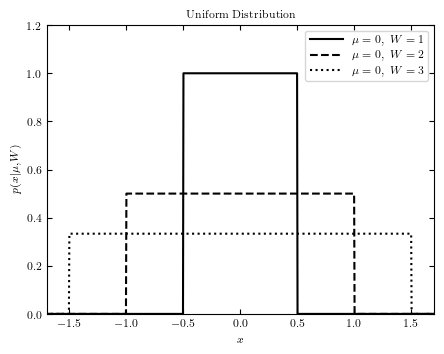

<Figure size 640x480 with 0 Axes>

In [2]:
# Since you're working with a copy of my notebook, you
# may need to change the path below to find the file
%matplotlib inline
%run ../../lectures/scripts/fig_uniform_distribution.py

We can implement [uniform](http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html#scipy.stats.uniform) in `scipy` as follows.  We'll use the methods listed at the bottom of the link to complete the cell: `dist.rvs(size=N)` which produces `N` random draws from the distribution and `dist.pdf(x)` which returns the value of the pdf at a given $x$. Lots of distributions can be accessed and used in a similar way.  

Create a uniform distribution with parameters `loc=0`,  `scale=2`, and `N=10`.

<font color='red'>Complete and execute the following cell</font>

In [3]:
import scipy
N = 10 # Complete
distU = scipy.stats.uniform(loc=0,scale=2) # Complete
draws = distU.rvs(N) # ten random draws
print(draws)

p = distU.pdf(1) # pdf evaluated at x=1

print(p)

[1.4112329  1.44670015 1.36095942 0.57158811 1.78453453 1.0533691
 0.57329788 1.79004977 0.56927338 0.95093887]
0.5


### Gaussian Distribution

As many of you know, the Gaussian distribution pdf is given by

$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right)$$

It is also called the **normal distribution** and can be noted by $\mathscr{N}(\mu,\sigma)$.


We love using Gaussians in physics and astronomy because they can approximate many distributions and are also super easy to work with. **The convolution of two Gaussians results in a Gaussian.**  So $\mathscr{N}(\mu_1,\sigma_1)$ convolved with $\mathscr{N}(\mu_2,\sigma_2)$ is $\mathscr{N}(\mu_1+\mu_2,\sqrt{\sigma_1^2+\sigma_2^2})$.

<font color='red'>Execute this cell</font>

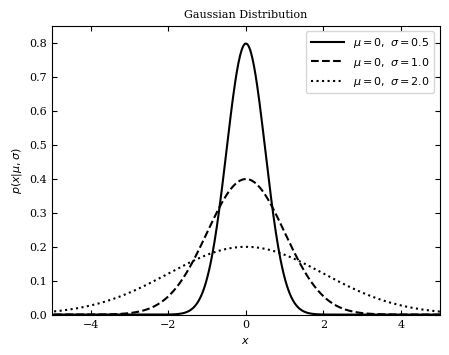

<Figure size 640x480 with 0 Axes>

In [4]:
%run ../../lectures/scripts/fig_gaussian_distribution.py

<font color='red'>Uncomment the next line and run this cell; I just want you to know that this magic function exists.</font>

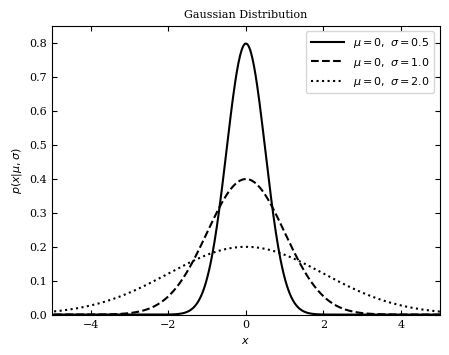

In [5]:
# %load ../../lectures/scripts/fig_gaussian_distribution.py
"""
Example of a Gaussian distribution
----------------------------------
Figure 3.8.

This shows an example of a gaussian distribution with various parameters.
We'll generate the distribution using::

    dist = scipy.stats.norm(...)

Where ... should be filled in with the desired distribution parameters
Once we have defined the distribution parameters in this way, these
distribution objects have many useful methods; for example:

* ``dist.pmf(x)`` computes the Probability Mass Function at values ``x``
  in the case of discrete distributions

* ``dist.pdf(x)`` computes the Probability Density Function at values ``x``
  in the case of continuous distributions

* ``dist.rvs(N)`` computes ``N`` random variables distributed according
  to the given distribution

Many further options exist; refer to the documentation of ``scipy.stats``
for more details.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
if "setup_text_plots" not in globals():
    from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=False)

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [0.5, 1.0, 2.0]
linestyles = ['-', '--', ':']
mu = 0
x = np.linspace(-10, 10, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(5, 3.75))

for sigma, ls in zip(sigma_values, linestyles):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    plt.plot(x, dist.pdf(x), ls=ls, c='black',
             label=r'$\mu=%i,\ \sigma=%.1f$' % (mu, sigma))

plt.xlim(-5, 5)
plt.ylim(0, 0.85)

plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')

plt.legend()
plt.show()


<font color='red'>Complete and execute the following cell</font>

In [6]:
distG = scipy.stats.norm(loc=100, scale=15) # Normal distribution with mean = 100, stdev = 15
draws = distG.rvs(10) # 10 random draws
p = distG.pdf(0) # pdf evaluated at x=0

print(draws)
print(p)

[110.22371713  78.34656817  86.02946399 122.94023703 102.32621596
 113.97048691  89.61779668  68.15313619  95.26723628 121.86433124]
5.940600124901435e-12


<font color='red'>Create a [normal distribution](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html?highlight=stats%20norm#scipy.stats.norm) with `loc=100` and `scale=15`. Produce 10 random draws and determine the probability at `x=145`.</font>

In [7]:
normal_dist = scipy.stats.norm(loc=100,scale=15)

N = 10
draws = normal_dist.rvs(N)

#Probability at x=145
p = normal_dist.pdf(145)
print(p)

0.0002954565607958672


<font color='red'>Make a plot of this Gaussian distribution. Plot the pdf from 0 to 200 with a 1000 gridpoints.</font>  

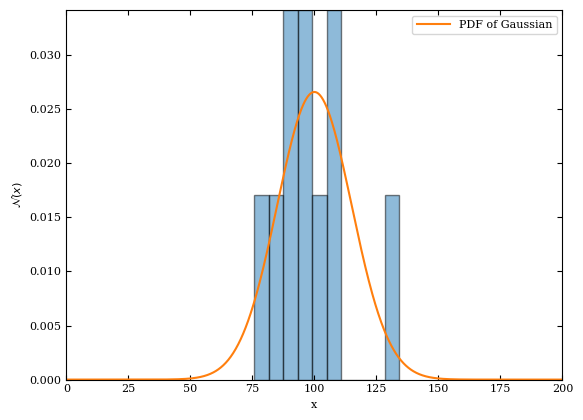

In [8]:
fig, ax = plt.subplots()
ax.hist(draws, bins=10, density=True, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('$\mathcal{N} (x)$')

x_arr = np.linspace(0,200,1000)
pdf = normal_dist.pdf(x_arr)

ax.plot(x_arr, pdf, label = 'PDF of Gaussian')
ax.legend()

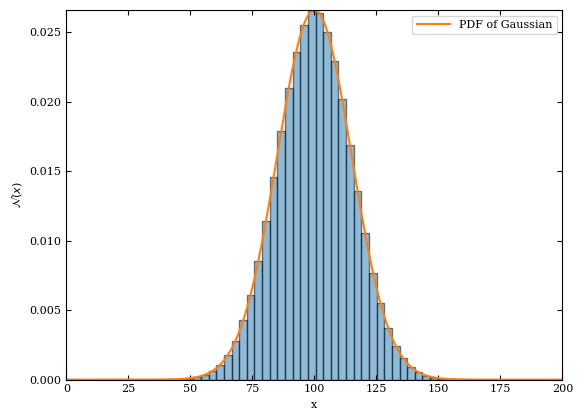

In [9]:
#Repeating the above exercise for N = 1 million samples
N2 = 10**6
draws2 = normal_dist.rvs(N2)

fig, ax = plt.subplots()
ax.hist(draws2, bins=50, density=True, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('$\mathcal{N} (x)$')

x_arr = np.linspace(0,200,1000)
pdf = normal_dist.pdf(x_arr)

ax.plot(x_arr, pdf, label = 'PDF of Gaussian')
ax.legend()

<font color='red'>Complete and execute the following cell</font>

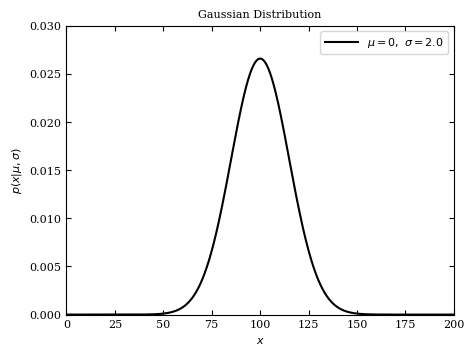

In [10]:
## Let's play with Gaussians! Or Normal distributions, N(mu,sigma)

xgrid = np.linspace(0,200,1000) # generate distribution for a uniform grid of x values
gaussPDF = distG.pdf(xgrid)  # this is a function of xgrid

# actual plotting
fig, ax = plt.subplots(figsize=(5, 3.75))

# Python3 f strings are awesome!
plt.plot(xgrid, gaussPDF, ls='-', c='black', 
         label=f'$\mu={mu},\ \sigma={sigma}$')
plt.xlim(0, 200)
plt.ylim(0, 0.03)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

The cumulative distribution function, cdf is the integral of pdf from $x'=-\infty$ to $x'=x$:

$$\mathrm{cdf}(x|\mu,\sigma) = \int_{-\infty}^{x} p(x'|\mu,\sigma) dx',$$

where $\mathrm{cdf}(\infty) = 1$. 

<font color='red'>Execute this cell</font>

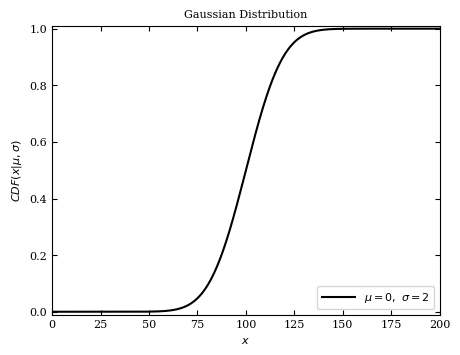

In [11]:
# The same as above but now with the cdf method
gaussCDF = distG.cdf(xgrid)
fig, ax = plt.subplots(figsize=(5, 3.75))
plt.plot(xgrid, gaussCDF, ls='-', c='black', 
         label=r'$\mu=%i,\ \sigma=%i$' % (mu, sigma))
plt.xlim(0, 200)
plt.ylim(-0.01, 1.01)
plt.xlabel('$x$')
plt.ylabel(r'$CDF(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend(loc=4)

#### Gaussian confidence levels

The probability of a measurement drawn from a Gaussian distribution that is between $\mu-a$ and $\mu+b$ is

$$\int_{\mu-a}^{\mu+b} p(x|\mu,\sigma) dx.$$

- For $a=b=1\sigma$, we get the familar result of 68.3%.  
- For $a=b=2\sigma$ it is 95.4%.  
- For $a=b=3\sigma$ it is $99.7\%$. 

So we refer to the range $\mu \pm 1\sigma$, $\mu \pm 2\sigma$, and $\mu \pm 3\sigma$ as the 68%, 95%, and $99.7%$ **confidence limits**, respectively. Note that if your distribution is not Gaussian, then these confidence intervals will be different!

***We often still refer to uncertainty regions of distributions as $1\sigma$ or $2\sigma$ regions, which for non-Gaussian distributions usually means (for $1\sigma$) the region enclosing the $16\%$ and $84\%$ quantiles.***

<font color='red'>What is the probability enclosed between $-2\sigma$ and $+4\sigma$? (*Verify first that you get the correct answer for the bullet points above!*)</font>

In [18]:
N=10000
mu=0
sigma=1
distN = scipy.stats.norm(mu, sigma) # Complete
ans = distN.cdf(4*sigma) - distN.cdf(-2*sigma)
print(ans)

0.9772181968099877


<font color='red'>Complete and execute the following cell</font>

In [14]:
N=10000
mu=0
sigma=1
distN = scipy.stats.norm(mu, sigma) # Complete
xgrid = np.linspace(mu - 2*sigma, mu + 4*sigma,N) # Complete
dx = (xgrid.max()-xgrid.min())/N
prob = distN.pdf(xgrid)*dx

print(prob.sum())

0.977136709173485


We could do this in various ways. The way you just tried was the most obvious-- brute-force numerical integration with the trapezoidal method. 

But the clever way is to use the cdf, by computing the cdf of the upper integration bound and subtracting the cdf of the lower integration bound.

<font color='red'>Complete and execute the following cell</font>

In [15]:
upper = distN.cdf(mu + 4*sigma)
lower = distN.cdf(mu - 2*sigma)
p = upper-lower
print(p)

0.9772181968099877


### Log Normal

Note that if $x$ is Gaussian distributed with $\mathscr{N}(\mu,\sigma)$, then $y=\exp(x)$ will have a **log-normal** distribution, where the mean of y is $\exp(\mu + \sigma^2/2)$, the median is $\exp(\mu)$, and the mode is $\exp(\mu-\sigma^2)$.  Try it.

<font color='red'>Execute this cell</font>

In [17]:
x = scipy.stats.norm(0,1) # mean = 0, stdev = 1
y = np.exp(x.rvs(100))

print(y.mean())
print(x)

1.7903627130856703


The catch here is that stats.norm(0,1) returns an *object* and not something that we can just do math on in the expected manner.  What *can* you do with it?  Try ```dir(x)``` to get a list of all the methods and properties.

In [18]:
# Execute this cell
distLN = scipy.stats.norm(0,1) # mean = 0, stdev = 1
x = distLN.rvs(10000)
y = np.exp(x)

print(np.exp(0 + 0.5*1), y.mean())

1.6487212707001282 1.6778317971001722


<font color='red'>Repeat the above calculations to verify the equations for the mode and median.</font>

In [98]:
#For median
print('Median: ', np.exp(0), np.median(y))


def mymode(arr, bins):

    #Calculate histogram
    counts, bin_edges = np.histogram(arr, bins)
    
    idx = np.where(counts == max(counts))[0][0]
    
    mbins = [bin_edges[idx], bin_edges[idx+1]]
    mbins
    mode = sum(mbins)/2

    return mode


#For mode
print('Mode: ', np.exp(-1), scipy.stats.mode(y, keepdims=False)[0], mymode(y, 10000))

#I have defined my own func for mode since scipy.stats.mode is giving a weird answer

Median:  1.0 0.9952394237895329
Mode:  0.36787944117144233 0.02640713573792681 0.36250150100221357


### $\chi^2$ Distribution

We'll run into the $\chi^2$ distribution when we talk about Maximum Likelihood in the next chapter.

If we have a Gaussian distribution with values ${x_i}$ and we scale and normalize them according to
$$z_i = \frac{x_i-\mu}{\sigma},$$
then the sum of squares, $Q$ 
$$Q = \sum_{i=1}^N z_i^2,$$
will follow the $\chi^2$ distribution.  The *number of degrees of freedom*, $k$ is given by the number of data points, $N$ (minus any constraints).  The pdf of $Q$ given $k$ defines $\chi^2$ and is given by
$$p(Q|k)\equiv \chi^2(Q|k) = \frac{1}{2^{k/2}\Gamma(k/2)}Q^{k/2-1}\exp(-Q/2),$$
where $Q>0$ and the $\Gamma$ function would denotes the gamma function, which has closed-form values for integer k.

This is ugly, but it is really just a formula like anything else.  Note that the shape of the distribution *only* depends on the sample size $N=k$ and not on $\mu$ or $\sigma$.  

<font color='red'>Execute this cell</font>

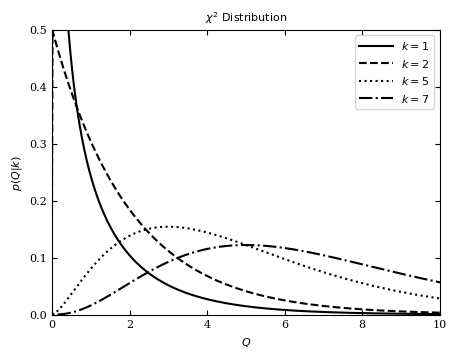

<Figure size 640x480 with 0 Axes>

In [99]:
%run ../../lectures/scripts/fig_chi2_distribution.py

### Chi-squared per degree of freedom

In practice we frequently divide $\chi^2$ by the number of degrees of freedom, and work with:

$$\chi^2_\mathrm{dof} = \frac{1}{N-1} \sum_{i=1}^N \left(\frac{x_i-\overline{x}}{\sigma}\right)^2$$

which (for large $k$) is distributed as

$$ p(\chi^2_\mathrm{dof}) \sim \mathscr{N}\left(1, \sqrt{\frac{2}{N-1}}\right) $$

(where $k = N-1$, and $N$ is the number of samples). Therefore, we expect $\chi^2_\mathrm{dof}$ to be 1, to within a few $\sqrt{\frac{2}{N-1}}$.